# 3. Self-consistent field 

## 3.3 Supplementary notes: multi-electron picture

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Constants (all MKS, except energy which is in eV)
hbar=1.055e-34 
q=1.602e-19
I0=q*q/hbar

#Parameters
U0=0.5 
kT=0.025
mu=0
ep=0.2
g1=0.005 
g2=0.005 
g=g1+g2
alphag=1
alphad=0.5

#Bias
IV=101 
VV=np.linspace(0,1,IV)

#Initializing arrays
p0=np.zeros((IV))
p1=np.zeros((IV))
p2=np.zeros((IV));

for iV in range(0,IV):
    Vd=0
    Vg=VV[iV];
    mu1=mu
    mu2=mu1-Vd
    UL=-(alphag*Vg)-(alphad*Vd)
    f1=1/(1+np.exp((ep+UL-mu1)/kT))
    f2=1/(1+np.exp((ep+UL-mu2)/kT))
    f1U=1/(1+np.exp((ep+UL+U0-mu1)/kT))
    f2U=1/(1+np.exp((ep+UL+U0-mu2)/kT))
    P1=((g1*f1)+(g2*f2))/(1e-6+(g1*(1-f1))+(g2*(1-f2)))
    P2=P1*((g1*f1U)+(g2*f2U))/(1e-6+(g1*(1-f1U))+(g2*(1-f2U)))
    P0=1/(1+P1+P1+P2)
    P1=P1*P0
    P2=P2*P0
    p0[iV]=P0
    p1[iV]=P1
    p2[iV]=P2

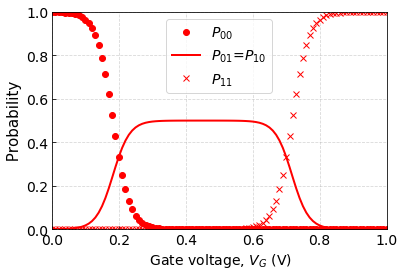

In [2]:
#for figure 3.4.2
plt.figure()

plt.plot(VV,p0,'ro',lw=1,label='$P_{00}$')
plt.plot(VV,p1,'r',lw=2,label='$P_{01}$=$P_{10}$')
plt.plot(VV,p2,'rx',lw=1,label='$P_{11}$')
plt.xlabel(' Gate voltage, $V_G$ (V) ',fontsize=14)
plt.ylabel(' Probability ',fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1)
plt.tick_params(axis='both',which='major',labelsize=14,direction='in')
plt.grid(alpha=0.5, ls='--')
plt.legend(loc=0,fontsize=14)